# Setup up semantic masks

A common way to perform panoptic segmentation is to combine together the outputs of semantic and instance segmentation. Consider the following image of a New York street.

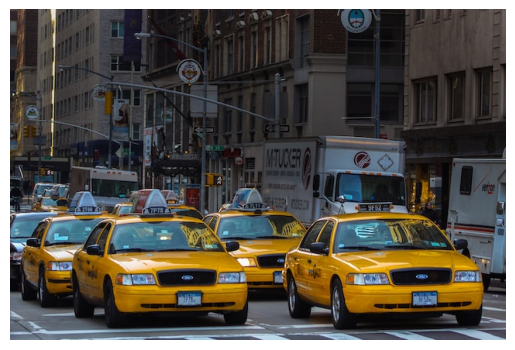

Your task is to segment it panoptically, such that each cab is identified as a separate object, while distinguishing between the asphalt and building backgrounds.

To achieve it, you will start by producing a semantic mask with a pre-trained U-Net, available to you as UNet(). Hopefully, it should distinguish between the two background types (but not between particular cabs)!

* Instantiate the U-Net model as model.
* Generate semantic_masks by passing the input image tensor to the model.
* Create single semantic mask by choosing the highest-probability class for each pixel.

In [ ]:
# Instantiate the model
model = UNet()

# Produce semantic masks for the input image
with torch.no_grad():
    semantic_masks = model(image_tensor)
    print(semantic_masks.shape) #  output: torch.Size([1, 3, 427, 640])
    

# Choose highest-probability class for each pixel
semantic_mask = torch.argmax(semantic_masks, dim = 1)

# Display the mask
plt.imshow(semantic_mask.squeeze(0))
plt.axis("off")
plt.show()

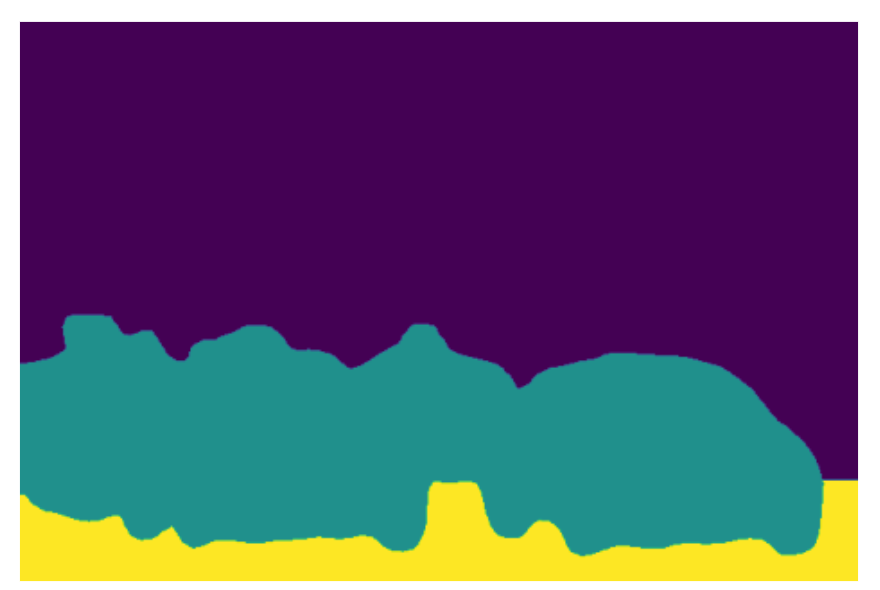

Good job producing the semantic mask! It will serve as a backgroud on which you will overlay instance masks next!

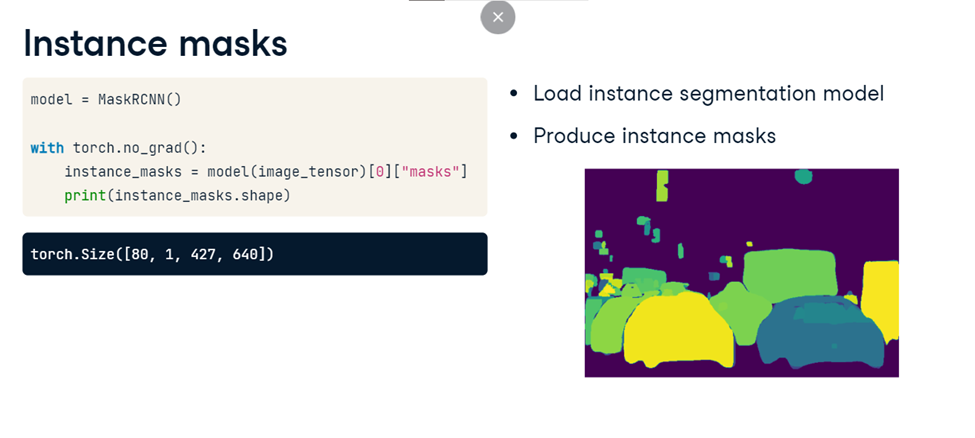

# Overlay instance masks

Good job producing the semantic mask in the previous exercise! Now, you can overwrite it with instance masks in the locations where the objects have been identified by the instance segmentation model.

You will use the pre-trained MaskRCNN available in your workspace to produce instance segmentation masks. Then, you will loop over these masks and for each of them, you will overlay the parts where an object is detected with high certainty on top of the semantic mask.

* Initialize panoptic_mask by cloning the semantic_mask.
* Define the for-loop to iterate over the instance masks, calling the iterator variable mask.
* For each instance mask, in location where it is larger than 0.5, overwrite the panoptic mask with the current istance_id.

In [ ]:
# Instantiate model and produce instance masks
model = MaskRCNN()
with torch.no_grad():
    instance_masks = model(image_tensor)[0]["masks"]

# Initialize panoptic mask as semantic_mask
panoptic_mask = torch.clone(semantic_mask)

# Iterate over instance masks
instance_id = 3
for mask in instance_masks:
    # Set panoptic mask to instance_id where mask > 0.5
    panoptic_mask[mask  > 0.5] = instance_id
    instance_id += 1
    
# Display panoptic mask
plt.imshow(panoptic_mask.squeeze(0))
plt.axis("off")
plt.show()

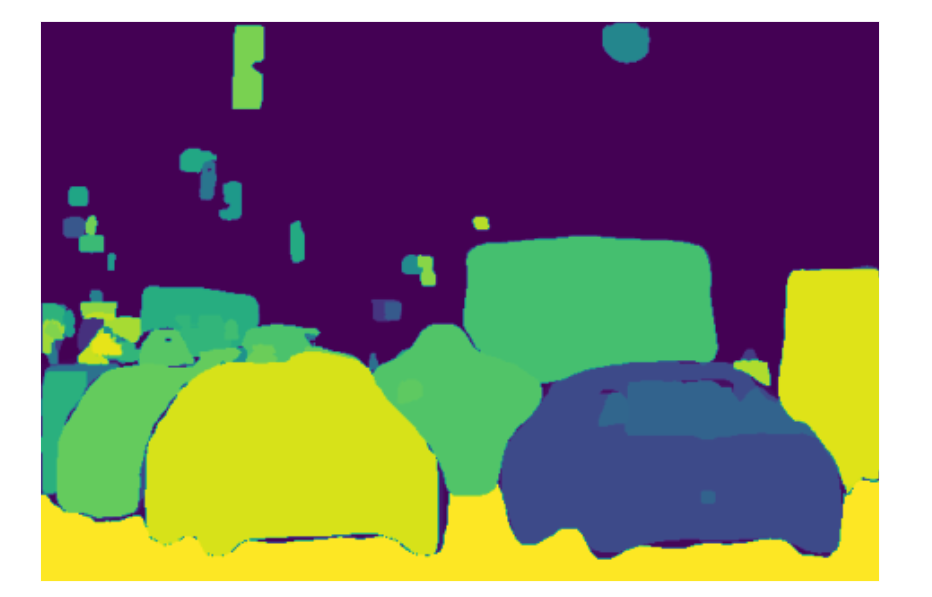

Congratulations! Now you can combine semantic and instance segmentation outputs to produce panoptic masks! Notice how each cab and even is segmented as a separate object, while the buildings background is distinguished from the street.